<a href="https://colab.research.google.com/github/10erick-cpu/Entregas_TP/blob/main/TP4/TP4_M%C3%A9todos_de_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico IV - Métodos de Clasificación**

### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Ing. Manlio Miguel Massiris


# **Librerias Usadas**

In [2]:
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import norm


# **Ejercicios**

Elegir uno de entre los siguientes proyectos (se agregan links a las NB
correspondientes) y aplicar clasificación para resolverlo. 

Cada proyecto tiene datasets de diferentes características (texto, imágenes, audio, etc.) por lo que tiene diferente dificultad (indicada con un semaforito).


Para los más sencillos trabajar individualmente y aplicar más de un
clasificador, utilizar diferentes parámetros, comparar evaluaciones.
Para los más complejos, trabajar en grupos de dos personas y aplicar un
único modelo.

# **Ejercicio 4.4**

# **Winsconsin Breast Cancer dataset**


Contiene una tabla con 569 datos de histología mamaria humana, 357 casos de tejido tumoral benigno y 212 tejido maligno. Los datos son 32 atributos radiómicos (tamaños, formas, texturas, etc.). 

El objetivo es desarrollar un clasificador que a través de los atributos permita predecir la benignidad o malignidad de un tumor.

**Notebook Asociado** :

https://github.com/manlio99/Materia-deaprendizaje/blob/master/3_MidtermProjects/ProjectBCD



# **Dataset a utilizar - Winsconsin Breast Cancer**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **Parámetros Estadísticos**

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# **Información del Dataframe**

El método **info()** nos proporciona información sobre el DataFrame.

Dicha información contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos). 

En funcion de esto  procedemos a definir el target  y los atributos .




In [5]:
inf = df.info()
inf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Comentario**

**Atributos**

Podemos apreciar que todas las columnas (atributos) tienen valores numericos excepto diagnosis, que será nuestro target (objetivo) para el modelo propuesto.


**Vamos a prescindir de las columnas** :


**id** -> Identificación del paciente , no relevante para el modelo.

**Unnamed:32** --> Presenta valores no numericos y no entrega información alguna.

# **Eliminación de columnas Irrelevantes para el modelo**

In [35]:
df1 = df.drop(columns=['id', 'Unnamed: 32'])
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Dividimos los Atributos (X - Features) y Objetivos (Y - Target)**

In [56]:
# LabelEncoder convierte una lista de datos de texto en valores numéricos
# Codificamos el target (diagnosis) a valores numéricos

# El método fit_transform nos permite entrenar el codificador y transformar
# el conjunto de datos simultáneamente

le = LabelEncoder()
df1['diagnosis'] = le.fit_transform(df1['diagnosis'])

# Separamos los atributos (features) y diagnosis (Target)

X = df1.drop(columns='diagnosis')
y = df1['diagnosis']


### Estandarizacion de Atributos

# Se obtienen los atributos (columnas) estandarizadas para que existan en una escala comun
# y poder compararlos facilmente.

# Esto permite que cada variable tenga una influencia similar en el modelo, 
# lo que le permite ser más estable y aumentar su efectividad.

scaler = StandardScaler()
scaler.fit(X)
X_norm = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_norm.head(10)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


# **Comportamiento del Modelo**

## **Consideramos --   70% Train / 30% Test** 


Se analiza el comportamiento del modelo, para distintos K, tomando un 70% del dataset para entrenamiento y 30% para prueba.

In [57]:
# test_size1 = 0.3

X_train = X_norm

# X_train = X

y_train = df1['diagnosis']
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train , test_size=0.3)

print('Datos para entrenamiento_70% : {}'.format(X_train.shape[0]))
print('Datos para prueba_30%: {}'.format(X_test.shape[0]))



Datos para entrenamiento_70% : 398
Datos para prueba_30%: 171


# **Modelos Propuestos - Evaluación**

# **Clasificador K vecinos más cercanos - KNeighborsClassifier** 

In [58]:
########### Analizamos la precision del Modelo para distinto valores n_neighbors ##############

#### n_neighbors=3 #####

knn1 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
Y_pred1 = knn1.predict(X_test)

#### n_neighbors=10 #####

knn2 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)
Y_pred2 = knn2.predict(X_test)

#### n_neighbors=30 #####

knn3 = neighbors.KNeighborsClassifier(n_neighbors=30)
knn3.fit(X_train, y_train)
Y_pred3 = knn3.predict(X_test)


print('Accuracy_n_neighbors_3: {}'.format(round(metrics.accuracy_score(Y_pred1,y_test),2)))
print('Accuracy_n_neighbors_10: {}'.format(round(metrics.accuracy_score(Y_pred2,y_test),2)))
print('Accuracy_n_neighbors_30: {}'.format(round(metrics.accuracy_score(Y_pred3,y_test),2)))

Accuracy_n_neighbors_3: 0.96
Accuracy_n_neighbors_10: 0.95
Accuracy_n_neighbors_30: 0.94


In [59]:
#### Accuracy Training set & Test set_ to_ n_neighbors=3 ####

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn1.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.96


# **Comparación de la tasa de error (Rate Error) con el valor K**

Best Error Rate: 0.04
Best value k for Error Rate: 3


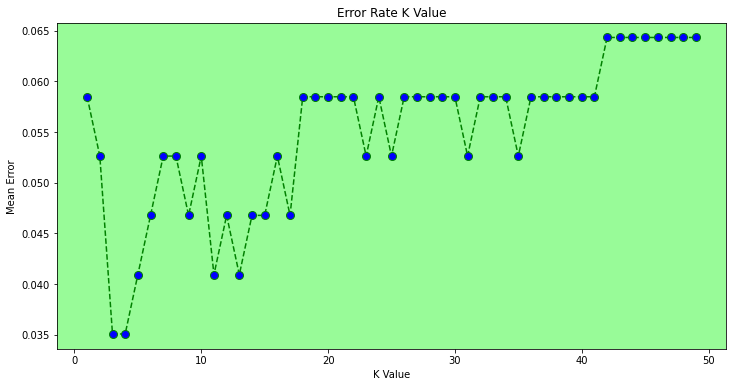

<Figure size 432x288 with 0 Axes>

In [60]:
error = []

# Calculamos el error para valores  K comprendido entre 1 y 50

for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

print('Best Error Rate:', round(min(error),2))
print('Best value k for Error Rate:', error.index(min(error))+1)

#################### Ploteo ####################################

plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("palegreen")


plt.plot(range(1,50), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.figure("lightgreen")
plt.show()

# **Ploteo Accurary Vs. K Value**


Best Accuracy: 0.96
Best Value k for Accuracy: 3


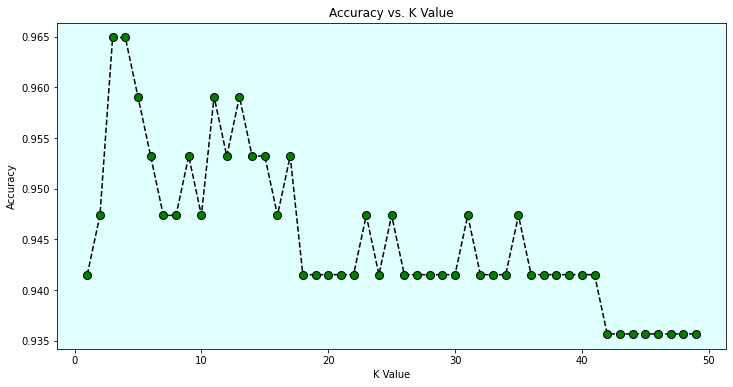

<Figure size 432x288 with 0 Axes>

In [61]:
accuracy_ = []

for i in range(1, 50):

    
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    prediction_1 = knn.predict(X_test)

    # Calculamos la Matriz de Confusion usando las predicciones realizada 
    # y comparandolo con el y_test.

    cm = metrics.confusion_matrix(y_test, prediction_1)

    #Calculamos algunas metricas

    TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
    acc_ = (TP+TN)/(TP+FP+FN+TN)
    accuracy_.append(acc_)
    

print('Best Accuracy:', round(max(accuracy_),2))
print('Best Value k for Accuracy:', accuracy_.index(max(accuracy_))+1)


#################### Ploteo ####################################

plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.set_facecolor("lightcyan")


plt.plot(range(1,50), accuracy_, color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.figure("lightgreen")
plt.show()



# **Precisión del modelo - Métricas de Clasificación**

Confirmemos la precisión del modelo viendo la Matriz de Confusión y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos.

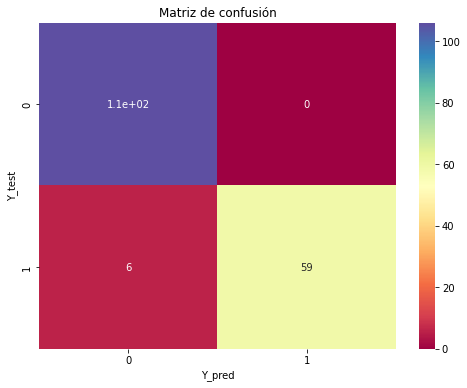

True positive =  106
False positive =  0
False negative =  6
True negative =  59

Matriz de Confusión: [[106   0]
 [  6  59]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       1.00      0.91      0.95        65

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [63]:
#Calculamos la matriz de confusión utilizando las predicciones realizadas y las comparamos con el test y.

## k = 3 

prediction = knn1.predict(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)



plt.figure(figsize = (8,6))
confusion_matrix1 = pd.crosstab(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(prediction), rownames=['Y_test'], colnames=['Y_pred'])

sns.heatmap(confusion_matrix1, annot=True,cmap = 'Spectral')
plt.title("Matriz de confusión")

plt.show()


######## Componentes de la Matriz de Confusión ########

def print_confusion_matrix(y_test, prediction):
    cm = confusion_matrix(y_test, prediction)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])


print_confusion_matrix(y_test, prediction)


#############################################################

#### Metricas de Clasificacion #####

# Asignaremos un valor entero al atributo 'diagnosis'
 # donde : 
 
 # Maligno = 1 
 # Benigno = 0 


target_names = ['0', '1']
print('\nMatriz de Confusión:',confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction, target_names=target_names))

# **Comentario**

*  Considerando un 70% del dataset para entrenamiento y 30% para prueba. podemos apreciar  el comportamiento del modelo, para distintos k (n_neighbors),obtiendo los siguientes resultados en funcion  de su precisión:



1.   Accuracy_n_neighbors_3: 0.96
2.   Accuracy_n_neighbors_10: 0.95
3.   Accuracy_n_neighbors_30: 0.94


*   Según estos resultados mostrados, se puede concluir que el modelo propuesto
presenta una buena performane (Accuracy) . 



# **Clasificador Support Vector Machine**

In [64]:
model = svm.SVC()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

print('Accuracy SVC: {}'.format(round(metrics.accuracy_score(Y_pred,y_test),2)))


Accuracy SVC: 0.97


# **Comentario**

Se puede observar el Accuracy del clasificador SVC es =  0.97, por lo tanto se puede concluir que es un modelo que presenta una alta perfomance.

# **SVM Kernel Functions**

Los algoritmos SVM utilizan un grupo de funciones matemáticas que se conocen como Kernels. La función de un kernel es requerir datos como entrada y transformarlos en la forma deseada.

Diferentes algoritmos SVM usan diferentes tipos de funciones de kernel. Estas funciones son de diferentes tipos, por ejemplo, lineal, no lineal, polinómica, gaussian (RBF) y sigmoid.

El tipo preferido de función del kernel es RBF. Porque está localizado y tiene una respuesta finita a lo largo del eje x completo.

Las funciones del kernel devuelven el producto escalar entre dos puntos en un espacio de características extremadamente adecuado. Definiendo así una noción de semejanza, con un pequeño coste de cálculo incluso en el caso de espacios de dimensiones muy elevadas.

Implementaremos Kernels : linear , polynomial, gaussian y sigmoid para analizar la perfomance del modelo

# **Entrenamiento del algoritmo**

# **1. Polynomial Kernel**

In [65]:
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)


SVC(kernel='poly')

# **Predicciones sobre el test data**


In [66]:
y_pred5 = svclassifier.predict(X_test)

# **Evaluación del modelo** 

In [67]:
print(confusion_matrix(y_test, y_pred5 ))
print(classification_report(y_test, y_pred5 ))

# print('Accuracy SVC: {}'.format(round(metrics.accuracy_score(y_pred5,y_test),2)))

[[106   0]
 [ 19  46]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       106
           1       1.00      0.71      0.83        65

    accuracy                           0.89       171
   macro avg       0.92      0.85      0.87       171
weighted avg       0.91      0.89      0.88       171



# **Gaussian Kernel**

In [68]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

# **Predicciones sobre el test data**


In [69]:
y_pred6  = svclassifier.predict(X_test)

# **Evaluación del modelo** 

In [70]:
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[106   0]
 [  5  60]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       106
           1       1.00      0.92      0.96        65

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# **Sigmoid Kernel**

In [71]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

# **Predicciones sobre el test data**


In [72]:
y_pred7 = svclassifier.predict(X_test)

# **Evaluación del modelo** 

In [73]:
print(confusion_matrix(y_test, y_pred7))
print(classification_report(y_test, y_pred7))

[[101   5]
 [  8  57]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       106
           1       0.92      0.88      0.90        65

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



# **Kernel Linear**

In [74]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


SVC(kernel='linear')

# **Predicciones sobre el test data**


In [75]:
y_pred8 = svclassifier.predict(X_test)

# **Evaluación del modelo** 

In [76]:
print(confusion_matrix(y_test, y_pred8))
print(classification_report(y_test, y_pred8))

[[105   1]
 [  5  60]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.98      0.92      0.95        65

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



# **Comparison of Kernel Performance**

In [77]:

print('Accuracy SVC_Polynomial kernel: {}'.format(round(metrics.accuracy_score(y_pred5,y_test),2)))
print('Accuracy SVC_Gaussian kernel: {}'.format(round(metrics.accuracy_score(y_pred6,y_test),2)))
print('Accuracy SVC_Sigmoid kernel: {}'.format(round(metrics.accuracy_score(y_pred7,y_test),2)))
print('Accuracy SVC_Linear kernel: {}'.format(round(metrics.accuracy_score(y_pred8,y_test),2)))

Accuracy SVC_Polynomial kernel: 0.89
Accuracy SVC_Gaussian kernel: 0.97
Accuracy SVC_Sigmoid kernel: 0.92
Accuracy SVC_Linear kernel: 0.96


True positive =  106
False positive =  0
False negative =  5
True negative =  60


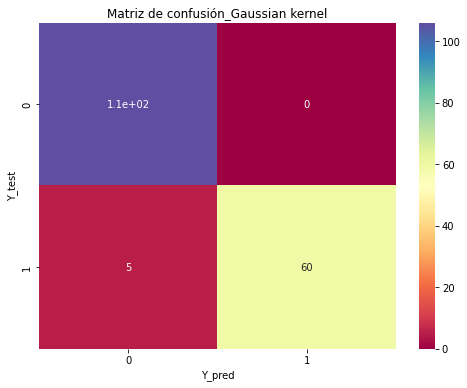

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       106
           1       1.00      0.92      0.96        65

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [78]:
######## Componentes de la Matriz de Confusión ########

def print_confusion_matrix(y_test, prediction):
    cm = confusion_matrix(y_test, prediction)    
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])


print_confusion_matrix(y_test, y_pred6)


###########################################################
plt.figure(figsize = (8,6))
cm = pd.crosstab(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred6), rownames=['Y_test'], colnames=['Y_pred'])
sns.heatmap(cm, annot=True,cmap = 'Spectral')
plt.title("Matriz de confusión_Gaussian kernel")
plt.show()


#############################################################

#### Metricas de Clasificacion #####

# Asignaremos un valor entero al atributo 'diagnosis'
 # donde : 
 
 # Maligno = 1 
 # Benigno = 0 


target_names = ['0', '1']
# print('\nMatriz de Confusión:',confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6, target_names=target_names))




# **Comentario**


Si comparamos la performance de los diferentes tipos de kernel, podemos ver claramente que el kernel Polynomial es el que peor se comporta.

los kernels Gaussian , Sigmoid kernel , Linear kernel presentan una buena perfomance para el modelo. Donde se puede observar que el kernel gaussiano tiene un mejor accuracy  y por ende una mejor eficacia.

No existe una regla estricta y rápida sobre qué kernel funciona mejor en cada escenario. Se trata de probar todos los kernels y seleccionar el que tenga los mejores resultados en su conjunto de datos de prueba.

# **Clasificador - Random Forests**

Es un método versátil de aprendizaje automático capaz de realizar tanto tareas de regresión como de clasificación. También lleva a cabo métodos de reducción dimensional, trata valores perdidos, valores atípicos y otros pasos esenciales de exploración de datos. Es un tipo de método de aprendizaje por conjuntos, donde un grupo de modelos débiles se combinan para formar un modelo poderoso.

Un modelo Random Forest está formado por un conjunto (ensemble) de árboles de decisión individuales, cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales

En este clasificador se ejecutan varios algoritmos de árbol de decisiones en lugar de uno solo. Para clasificar un nuevo objeto basado en atributos, cada árbol de decisión da una clasificación y finalmente la decisión con mayor “votos” es la predicción del algoritmo.




# **n_estimators = 10**

n_estimators --> The number of trees in the forest.

In [79]:
model = RandomForestClassifier(
             random_state = 4 ,
             n_estimators = 10,
             criterion = 'entropy',
             max_features = 'auto',
             oob_score    = False,
            n_jobs       = -1,
          )     
  
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                       random_state=4)

# **Predicciones sobre el test data**

In [80]:
y_pred9 = model.predict(X_test)

# **Accuracy _ n_estimators = 10**

In [81]:
print('Accuracy RandomForest_ n_estimators = 10 : {}'.format(round(metrics.accuracy_score(y_pred9,y_test),2)))

Accuracy RandomForest_ n_estimators = 10 : 0.93


# **n_estimators = 40**

In [82]:
model1 = RandomForestClassifier(
             random_state = 4 ,
             n_estimators = 40,
             criterion = 'entropy',
             max_features = 'auto',
             oob_score    = False,
            n_jobs       = -1,
          )     
  
model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                       random_state=4)

# **Predicciones sobre el test data**

In [83]:
y_pred11 = model.predict(X_test)

# **Accuracy _ n_estimators = 40**

In [84]:
print('Accuracy RandomForest_ n_estimators = 40 : {}'.format(round(metrics.accuracy_score(y_pred11,y_test),2)))

Accuracy RandomForest_ n_estimators = 40 : 0.93


# **n_estimators = 100**

In [85]:
model2 = RandomForestClassifier(
             random_state = 4 ,
             n_estimators = 100,
             criterion = 'entropy',
             max_features = 'auto',
             oob_score    = False,
            n_jobs       = -1,
          )     
  
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=4)

# **Predicciones sobre el test data**

In [86]:
y_pred10 = model2.predict(X_test)

# **Accuracy _ n_estimators = 100**

In [87]:
print('Accuracy RandomForest_ n_estimators = 100 : {}'.format(round(metrics.accuracy_score(y_pred10,y_test),2)))

Accuracy RandomForest_ n_estimators = 100 : 0.95


# **Confusion Matrix _ n_estimators = 100**

[[104   2]
 [  6  59]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       106
           1       0.97      0.91      0.94        65

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

True positive =  104
False positive =  2
False negative =  6
True negative =  59


Text(0.5, 33.0, 'Y_pred')

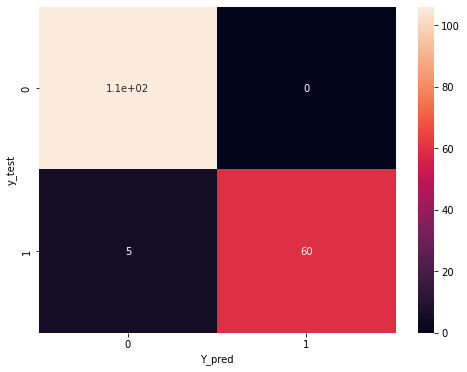

In [88]:
print(metrics.confusion_matrix(y_test, y_pred10, labels=[0, 1]))
print(metrics.classification_report(y_test, y_pred10, labels=[0, 1]))

print_confusion_matrix(y_test, y_pred10)

# cm = confusion_matrix(y_test, y_pred10, labels=[0, 1])

plt.figure(figsize = (8,6))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('Y_pred')

# **Comparison of n_estimators Performance**

In [89]:
print('Accuracy RandomForest_ n_estimators = 10 : {}'.format(round(metrics.accuracy_score(y_pred9,y_test),2)))
print('Accuracy RandomForest_ n_estimators = 40 : {}'.format(round(metrics.accuracy_score(y_pred11,y_test),2)))
print('Accuracy RandomForest_ n_estimators = 100 : {}'.format(round(metrics.accuracy_score(y_pred10,y_test),2)))

Accuracy RandomForest_ n_estimators = 10 : 0.93
Accuracy RandomForest_ n_estimators = 40 : 0.93
Accuracy RandomForest_ n_estimators = 100 : 0.95


# **Comentario**


Observando los resultados, podemos concluir que el clasificador Random Forests para los estimators analizados presenta una buena performance.

# **Clasificador Regresión Logística**

# **max_iter=100**

In [90]:
model3  = LogisticRegression(
                  max_iter=100,
                  tol= 0.0001, 
                  C = 1, 
                  random_state=4,
                  solver= 'liblinear'
              )
        
model3.fit(X_train, y_train)


LogisticRegression(C=1, random_state=4, solver='liblinear')

# **Predicciones sobre el test data**

In [91]:
y_pred12 = model3.predict(X_test)

# **Accuracy -  max_iter = 100**

In [92]:
print('Accuracy LogisticRegression - max_iter = 100 : {}'.format(round(metrics.accuracy_score(y_pred12,y_test),2)))

Accuracy LogisticRegression - max_iter = 100 : 0.98


# **Confusion Matrix - max_iter = 100**

[[106   0]
 [  4  61]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       106
           1       1.00      0.94      0.97        65

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

True positive =  106
False positive =  0
False negative =  4
True negative =  61


Text(0.5, 33.0, 'Y_pred')

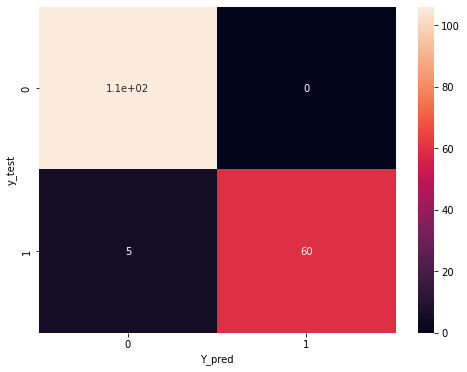

In [93]:
print(metrics.confusion_matrix(y_test, y_pred12, labels=[0, 1]))
print(metrics.classification_report(y_test, y_pred12, labels=[0, 1]))

print_confusion_matrix(y_test, y_pred12)

# cm = confusion_matrix(y_test, y_pred10, labels=[0, 1])

plt.figure(figsize = (8,6))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('Y_pred')

# **Comparacion de Resultados**


Se analizaron varios clasificadores considerando diferentes parámetros de los cuales se desprenden los siguientes resultados :





In [97]:
print('Accuracy_n_neighbors_3: {}'.format(round(metrics.accuracy_score(Y_pred1,y_test),2)))
print('Accuracy_n_neighbors_10: {}'.format(round(metrics.accuracy_score(Y_pred2,y_test),2)))
print('Accuracy_n_neighbors_30: {}'.format(round(metrics.accuracy_score(Y_pred3,y_test),2)))

print(' \nAccuracy SVC_Polynomial kernel: {}'.format(round(metrics.accuracy_score(y_pred5,y_test),2)))
print('Accuracy SVC_Gaussian kernel: {}'.format(round(metrics.accuracy_score(y_pred6,y_test),2)))
print('Accuracy SVC_Sigmoid kernel: {}'.format(round(metrics.accuracy_score(y_pred7,y_test),2)))
print('Accuracy SVC_Linear kernel: {}'.format(round(metrics.accuracy_score(y_pred8,y_test),2)))

print('\nAccuracy RandomForest_ n_estimators = 10 : {}'.format(round(metrics.accuracy_score(y_pred9,y_test),2)))
print('Accuracy RandomForest_ n_estimators = 40 : {}'.format(round(metrics.accuracy_score(y_pred11,y_test),2)))
print('Accuracy RandomForest_ n_estimators = 100 : {}'.format(round(metrics.accuracy_score(y_pred10,y_test),2)))

print('\nAccuracy LogisticRegression - max_iter = 100 : {}'.format(round(metrics.accuracy_score(y_pred12,y_test),2)))

Accuracy_n_neighbors_3: 0.96
Accuracy_n_neighbors_10: 0.95
Accuracy_n_neighbors_30: 0.94
 
Accuracy SVC_Polynomial kernel: 0.89
Accuracy SVC_Gaussian kernel: 0.97
Accuracy SVC_Sigmoid kernel: 0.92
Accuracy SVC_Linear kernel: 0.96

Accuracy RandomForest_ n_estimators = 10 : 0.93
Accuracy RandomForest_ n_estimators = 40 : 0.93
Accuracy RandomForest_ n_estimators = 100 : 0.95

Accuracy LogisticRegression - max_iter = 100 : 0.98


**En función de los resultados podemos concluir que los clasificadores con mayor precisión son :**


SVC_Gaussian kernel: 0.97

LogisticRegression - max_iter = 100 : 0.98

KNN_n_neighbors_3: 0.96


